<a href="https://colab.research.google.com/github/akashnarwal7/Walmart-kaggle-Compitetion/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split






In [7]:

storeData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/stores.csv")
featureData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/features.csv")
trainData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/train.csv")
testData=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/walmartTest.csv")
sampleSubmission=pd.read_csv("/content/drive/MyDrive/walmart kaggle Compitetion/walmart-recruiting-sales-in-stormy-weather/sampleSubmission.csv")



In [8]:
print("store Data ")
print(storeData.loc[storeData['Type']=='A'])
print(" Type B")
print(storeData.loc[storeData['Type']=='B'])
print(" Type C")
storeData.loc[storeData['Type']=='C']

store Data 
    Store Type    Size
0       1    A  151315
1       2    A  202307
3       4    A  205863
5       6    A  202505
7       8    A  155078
10     11    A  207499
12     13    A  219622
13     14    A  200898
18     19    A  203819
19     20    A  203742
23     24    A  203819
25     26    A  152513
26     27    A  204184
27     28    A  206302
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
35     36    A   39910
38     39    A  184109
39     40    A  155083
40     41    A  196321
 Type B
    Store Type    Size
2       3    B   37392
4       5    B   34875
6       7    B   70713
8       9    B  125833
9      10    B  126512
11     12    B  112238
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
20     21    B  140167
21     22    B  119557
22     23    B  114533
24     25    B  128107
28     29    B   93638
34     35    B  103681
44     45    B  118221
 Type C


,Store,Type,Size
29,30,C,42988
36,37,C,39910
37,38,C,39690
41,42,C,39690
42,43,C,41062
43,44,C,39910


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Size'}>]], dtype=object)

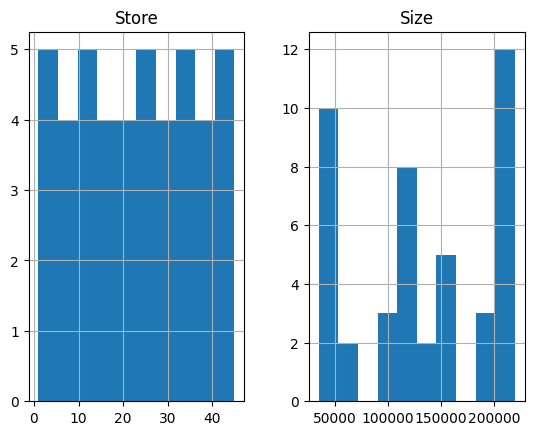

In [9]:
storeData.hist()

In [10]:
storeData['Type'].value_counts()

,count
Type,
A,22
B,17
C,6


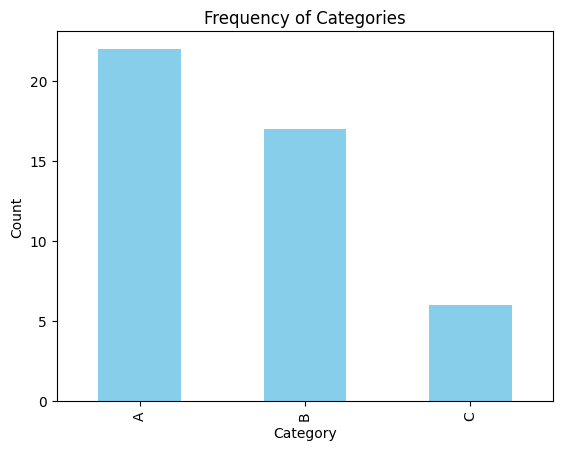

In [11]:
counts=storeData['Type'].value_counts()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Categories')
plt.show()

In [12]:
print("fEATURE Data")
featureData.head()

fEATURE Data


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
print(" Train Data ")
trainData.head()

 Train Data 


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
print("Test Data")
print(testData)

Test Data
        Store  Dept        Date  IsHoliday
0           1     1  02-11-2012      False
1           1     1  09-11-2012      False
2           1     1  16-11-2012      False
3           1     1  23-11-2012       True
4           1     1  30-11-2012      False
...       ...   ...         ...        ...
115059     45    98  28-06-2013      False
115060     45    98  05-07-2013      False
115061     45    98  12-07-2013      False
115062     45    98  19-07-2013      False
115063     45    98  26-07-2013      False

[115064 rows x 4 columns]


In [15]:
print("submission csv Data")
sampleSubmission.head()

submission csv Data


,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,0


1. Splitting a Test set

In [17]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Now if we observe there are two Non -Numeric columns Date, IsHoliday .
we should perform encoding as we can only find correlation with only numeric columns.


Perform Encoding .

In [31]:
EncodeTrainData=trainData.copy()



In [32]:
from sklearn.preprocessing import OneHotEncoder

date_encoder=OneHotEncoder()
date_encoded=date_encoder.fit_transform(EncodeTrainData[['Date']])
date_encoded_array=date_encoded.toarray()

# convert this numpy array into a dataframe.

date_encoded_df=pd.DataFrame(date_encoded_array, columns=date_encoder.get_feature_names_out(['Date']))
date_encoded_df

# Now we have Encoded Date DataFrame .

,Date_2010-02-05,Date_2010-02-12,Date_2010-02-19,Date_2010-02-26,Date_2010-03-05,Date_2010-03-12,Date_2010-03-19,Date_2010-03-26,Date_2010-04-02,Date_2010-04-09,...,Date_2012-08-24,Date_2012-08-31,Date_2012-09-07,Date_2012-09-14,Date_2012-09-21,Date_2012-09-28,Date_2012-10-05,Date_2012-10-12,Date_2012-10-19,Date_2012-10-26
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
421566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
421567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
421568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now lets encode IsHoliday Boolean DataType

In [33]:
from sklearn.preprocessing import OneHotEncoder

IsHoliday_encoder=OneHotEncoder()
IsHoliday_encoded=IsHoliday_encoder.fit_transform(EncodeTrainData[['IsHoliday']])
IsHoliday_encoded_array=IsHoliday_encoded.toarray()

# convert this numpy array into a dataframe.

IsHoliday_encoded_df=pd.DataFrame(IsHoliday_encoded_array, columns=IsHoliday_encoder.get_feature_names_out(['IsHoliday']))
IsHoliday_encoded_df

# Now we have Encoded Date DataFrame .

,IsHoliday_False,IsHoliday_True
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
421565,1.0,0.0
421566,1.0,0.0
421567,1.0,0.0
421568,1.0,0.0


Let us Concatenate the Encoded Data of all columns .

In [34]:


Encoded_Train_Data=pd.concat([EncodeTrainData,date_encoded_df,IsHoliday_encoded_df],axis=1)
Encoded_Train_Data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Date_2010-02-05,Date_2010-02-12,Date_2010-02-19,Date_2010-02-26,Date_2010-03-05,...,Date_2012-09-07,Date_2012-09-14,Date_2012-09-21,Date_2012-09-28,Date_2012-10-05,Date_2012-10-12,Date_2012-10-19,Date_2012-10-26,IsHoliday_False,IsHoliday_True
0,1,1,2010-02-05,24924.50,False,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,2010-02-12,46039.49,True,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,2010-02-19,41595.55,False,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,2010-02-26,19403.54,False,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,2010-03-05,21827.90,False,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
421566,45,98,2012-10-05,628.10,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
421567,45,98,2012-10-12,1061.02,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
421568,45,98,2012-10-19,760.01,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
Encoded_Train_Data.drop(['Date','IsHoliday'],axis=1,inplace=True)


KeyError: "['Date', 'IsHoliday'] not found in axis"

In [37]:
Encoded_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Columns: 148 entries, Store to IsHoliday_True
dtypes: float64(146), int64(2)
memory usage: 476.0 MB


In [38]:
Encoded_Train_Data.head()


,Store,Dept,Weekly_Sales,Date_2010-02-05,Date_2010-02-12,Date_2010-02-19,Date_2010-02-26,Date_2010-03-05,Date_2010-03-12,Date_2010-03-19,...,Date_2012-09-07,Date_2012-09-14,Date_2012-09-21,Date_2012-09-28,Date_2012-10-05,Date_2012-10-12,Date_2012-10-19,Date_2012-10-26,IsHoliday_False,IsHoliday_True
0,1,1,24924.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,46039.49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,41595.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,19403.54,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,21827.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
Encoded_Train_Data.corr()

,Store,Dept,Weekly_Sales,Date_2010-02-05,Date_2010-02-12,Date_2010-02-19,Date_2010-02-26,Date_2010-03-05,Date_2010-03-12,Date_2010-03-19,...,Date_2012-09-07,Date_2012-09-14,Date_2012-09-21,Date_2012-09-28,Date_2012-10-05,Date_2012-10-12,Date_2012-10-19,Date_2012-10-26,IsHoliday_False,IsHoliday_True
Store,1.000000,0.024004,-0.085195,-0.001064,-0.001207,-0.001066,-0.001043,-0.001028,-0.000902,-0.000981,...,0.000473,0.000504,0.000199,0.000240,0.000503,0.000162,0.000308,0.000437,0.000548,-0.000548
Dept,0.024004,1.000000,0.148032,-0.000217,0.000322,0.000125,-0.000421,-0.000591,-0.000422,-0.000542,...,0.000525,0.000476,0.000069,-0.000293,0.000696,0.000957,-0.000292,-0.000212,-0.000916,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.003162,0.001372,0.000874,-0.003999,-0.000222,-0.001607,-0.002564,...,0.001162,-0.003986,-0.003671,-0.004504,0.000008,-0.002060,-0.002534,-0.002182,-0.012774,0.012774
Date_2010-02-05,-0.001064,-0.000217,0.003162,1.000000,-0.007060,-0.007085,-0.007054,-0.007046,-0.007058,-0.007045,...,-0.007072,-0.007073,-0.007064,-0.007067,-0.007084,-0.007101,-0.007053,-0.007064,0.023114,-0.023114
Date_2010-02-12,-0.001207,0.000322,0.001372,-0.007060,1.000000,-0.007087,-0.007055,-0.007047,-0.007059,-0.007046,...,-0.007073,-0.007075,-0.007065,-0.007069,-0.007085,-0.007102,-0.007054,-0.007065,-0.305453,0.305453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Date_2012-10-12,0.000162,0.000957,-0.002060,-0.007101,-0.007102,-0.007128,-0.007096,-0.007088,-0.007100,-0.007086,...,-0.007114,-0.007115,-0.007106,-0.007109,-0.007126,1.000000,-0.007095,-0.007106,0.023251,-0.023251
Date_2012-10-19,0.000308,-0.000292,-0.002534,-0.007053,-0.007054,-0.007079,-0.007048,-0.007040,-0.007052,-0.007039,...,-0.007066,-0.007067,-0.007058,-0.007061,-0.007078,-0.007095,1.000000,-0.007058,0.023094,-0.023094
Date_2012-10-26,0.000437,-0.000212,-0.002182,-0.007064,-0.007065,-0.007090,-0.007059,-0.007051,-0.007063,-0.007049,...,-0.007077,-0.007078,-0.007069,-0.007072,-0.007089,-0.007106,-0.007058,1.000000,0.023130,-0.023130
IsHoliday_False,0.000548,-0.000916,-0.012774,0.023114,-0.305453,0.023200,0.023098,0.023070,0.023110,0.023067,...,-0.305973,0.023161,0.023130,0.023141,0.023196,0.023251,0.023094,0.023130,1.000000,-1.000000


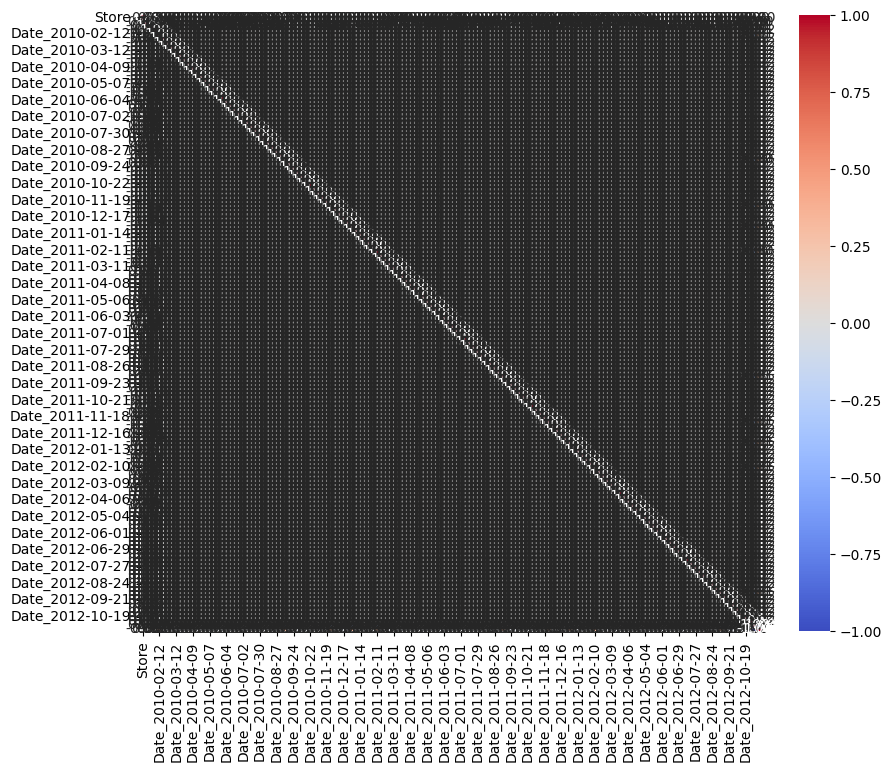

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(Encoded_Train_Data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()